In [1]:
import os 
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc="progress: ")

pd.set_option("max_columns",100)
pd.set_option("max_rows",100)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  import sys
/opt/conda/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
DIR = "../input/20201115at/"

train = pd.read_csv(DIR+"train.csv")
test = pd.read_csv(DIR+"test.csv")
video = pd.read_csv(DIR+"advertiser_video.csv")
map_game_feed_native_video_assets = pd.read_csv(DIR+'map_game_feed_native_video_assets.csv')
advertiser_converted_video = pd.read_csv(DIR+'advertiser_converted_video.csv')
advertiser_video = pd.read_csv(DIR+'advertiser_video.csv')
campaign = pd.read_csv(DIR+'campaign.csv')

# train & test

In [3]:
train["imp_at"] = pd.to_datetime(train["imp_at"])
test["imp_at"] = pd.to_datetime(test["imp_at"])

In [4]:
train["date"] = train["imp_at"].dt.date

In [5]:
train.target.mean()

0.03278442326898095

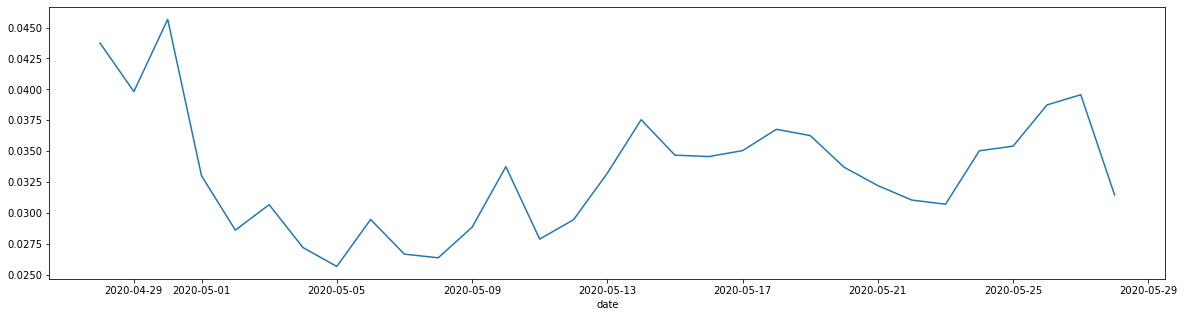

In [6]:
plt.figure(figsize=(20,5))
train.groupby("date").target.mean().plot()

In [7]:
train.head()

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id,date
0,ad6a7b7894f142d81a1e,2020-04-28 00:04:14.639,0,4,1111,2.0,1b29c3959fc76425d130,efef8f05c293786ae95d,1.0,9ce932d55f27ed28f0e5,8497,2020-04-28 00:04:21.581000,JP,2020-04-29 00:04:05.618000,1490644.0,0,0,4,8371aa8713627e51023c,NaN,0.0,1.0,NaN,NaN,11320.0,29835.0,10.0,2607.0,NaN,1,13.3.1,0,30cfce348022c3812b3a,1,a96538aec6d5d90fd8d9,2020-04-28
1,ac8453e4a93391812b78,2020-04-28 00:09:13.759,0,28,1081,2.0,ba2bb260d8eccd0057a4,85518c203c727a6fcd6e,2.0,23f7cf2bddc97c599ac4,0,2020-04-29 01:59:08.418000,JP,2020-04-29 10:23:18.079000,790412.0,2,1,4,b28c75eda0294ffd7924,NaN,0.0,1.0,NaN,NaN,12589.0,159596.0,2.0,13540.0,c3292411366546db2194,2,9.0.0,1,4c28854cab6a85c37dab,2,297ade72d5f1e9ed6e2f,2020-04-28
2,4959adca0d9284e642c9,2020-04-28 00:09:14.708,0,42,1123,3.0,0aaa2635cef6c96c7932,d01b84105c697315f36d,1.0,2dde952bf6521fac0b71,0,2020-04-28 00:09:29.655000,JP,2020-04-29 00:08:42.200000,1506105.0,0,0,4,200c99de864be1a88010,953c7610a60e2543c073,NaN,NaN,80525.0,906634.0,10254.0,156643.0,9.0,33725.0,07514730ff1e69100233,1,12.1.2,0,b35f0cd7210c4273489c,1,NaN,2020-04-28
3,622c44ebc7cf591d046e,2020-04-28 00:10:40.291,0,8,1113,2.0,1ed4e5bb950da757976a,c72faf7a97213d7e4c8c,1.0,1cbbcb2f33a045e5a09c,0,2020-04-28 00:10:50.270000,JP,2020-04-29 00:03:56.930000,184283.0,0,0,4,b98336c3d597f3d62202,NaN,NaN,1.0,NaN,NaN,39618.0,NaN,4.0,7377.0,84a2cff85228c12b0e6a,1,13.4.1,0,57dc1bf69be06dac416c,1,b5401899f2db8ce48d43,2020-04-28
4,3093c6746ae6e35b9ad5,2020-04-28 00:11:45.895,0,22,1061,NaN,d352ebd3462849796754,0376415068bf3e5b9e95,4.0,84095859da9cffce1c60,0,2020-05-05 17:39:43.537000,JP,2020-05-05 23:56:19.105000,1999495.0,2,1,2,84ed0ed356eb339c6eaa,5f60f2a2df7efc8f339e,1.0,0.0,NaN,NaN,35652.0,1566749.0,5.0,164759.0,2fd1c330d5a47edc039b,1,12.4.5,0,7ca7b54b97093b084027,1,NaN,2020-04-28


In [8]:
test.head()

,request_id,imp_at,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,country_code,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_login_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id
0,9747ce53a3cb6b71083d,2020-06-27 00:04:19.064,26,1069,3.0,f18c256a442a34e0b415,e2e4c7033fd8b771cbc9,1.0,68bf8df385e56d7c7224,0,JP,125284.0,2,0,4,8b94124cb457e78df93c,NaN,NaN,0.0,NaN,18279.0,1,31684.0,1dd7e16fec6017fdc4cc,1,13.5.1,1,d88dff8c67cbca5063b6,1,NaN
1,688ca2024829c392a509,2020-06-27 00:11:59.392,28,1081,1.0,1ed4e5bb950da757976a,39b1641c9aee267d6c8c,2.0,0b4017d3f3113de38ba6,0,JP,489271.0,0,1,4,63096db91899bdcb91f3,NaN,0.0,1.0,NaN,12665.0,1,224419.0,08c200079eb692fd93b8,2,8.0.0,1,ecb26d89e786f4710c62,2,69b22b4400be9d91e6cc
2,b0b8044a2428958ac17b,2020-06-27 00:14:09.341,28,1081,2.0,5b843a28e245912f51ca,483c546765bd610ab0e3,2.0,985dfa150be554b1714d,0,US,390685.0,1,1,4,1951ab4e1ad406da7f95,NaN,0.0,1.0,NaN,7521.0,5,16301.0,0860cd60ba0f3eef24d8,2,10.0.0,1,85e9de3b175557cf577f,2,297ade72d5f1e9ed6e2f
3,6b9bb6e4f70cad3a629a,2020-06-27 00:18:08.399,27,1073,3.0,1ed4e5bb950da757976a,65235845da2e07e67145,1.0,b3857c6735bc69ea932d,0,JP,76181.0,0,1,4,5e9fa5bdd5eb5ebbcecd,953c7610a60e2543c073,0.0,NaN,84033.0,64583.0,8,2701.0,43b7a628b6db774cc045,2,5.0.2,0,0bba4196f93ca1cdbc22,2,NaN
4,07234a3c7389cc36bc0e,2020-06-27 00:23:18.583,26,1069,3.0,1a71092d4f938588d1fd,c542bacba91a6b4b595f,1.0,8da6c586bd1089956477,8305,JP,244134.0,2,0,4,45884361e5d2f0985572,NaN,NaN,0.0,NaN,35453.0,1,53622.0,d0eab9db52e426309036,2,9,1,947fc17776732f10cc9e,2,NaN


In [9]:
train.shape, test.shape

((1997595, 36), (390095, 30))

In [10]:
set(train.columns) - set(test.columns)

{'click_or_view_at',
 'cv_at',
 'date',
 'last_cv_interval',
 'last_paid_interval',
 'target'}

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997595 entries, 0 to 1997594
Data columns (total 36 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   request_id               object        
 1   imp_at                   datetime64[ns]
 2   target                   int64         
 3   adnw_id                  int64         
 4   adspot_id                int64         
 5   adspot_video_format_id   float64       
 6   advertiser_id            object        
 7   app_id                   object        
 8   auction_type_id          float64       
 9   campaign_id              object        
 10  category_id              int64         
 11  click_or_view_at         object        
 12  country_code             object        
 13  cv_at                    object        
 14  first_login_interval     float64       
 15  frequency                int64         
 16  from_click               int64         
 17  game_feed_asset_type_id  in

In [12]:
tmp = train[train.uid=="14c3e5840f048fdfa431"].copy()
# cumsum from click by uid
tmp1 = tmp.groupby(['uid'])['target'].progress_apply(lambda x: pd.concat([pd.DataFrame([0]), x.cumsum()[:-1]])).reset_index(drop=True).values
tmp1 = np.array(tmp1, dtype=float)
# cumsum total num by uid
tmp2 = tmp.groupby(['uid']).cumcount().values
tmp2 = np.array(tmp2, dtype=float).reshape(-1,1)
# https://stackoverflow.com/questions/26248654/how-to-return-0-with-divide-by-zero
target_mean = np.divide(tmp1, tmp2, out=np.ones_like(tmp1)*-1, where=tmp2!=0)

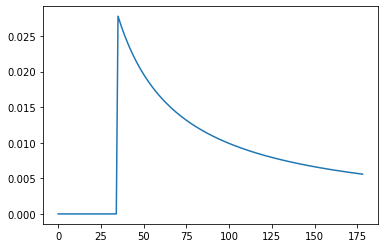

In [13]:
plt.plot(np.arange(len(target_mean[1:])), target_mean[1:])

In [14]:
train0 = train[train.target==0].copy()
train1 = train[train.target==1].copy()

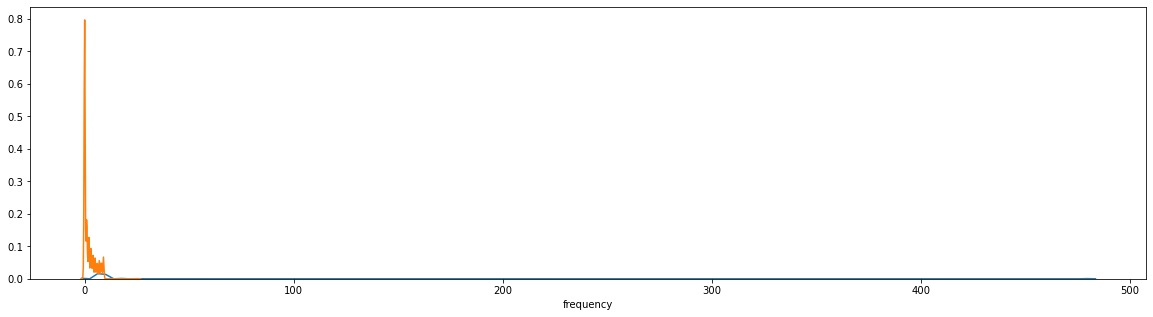

In [15]:
plt.figure(figsize=(20,5))
sns.distplot(train0["frequency"], hist=False)
sns.distplot(train1["frequency"], hist=False)

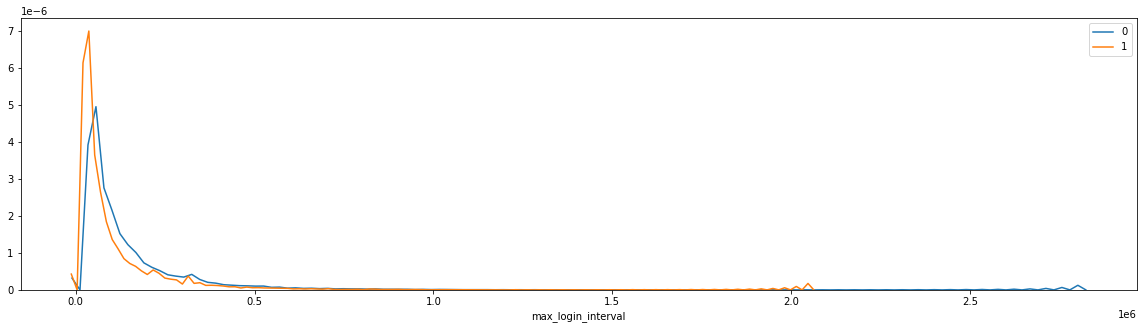

In [16]:
plt.figure(figsize=(20,5))
sns.distplot(train0["max_login_interval"], hist=False, label="0")
sns.distplot(train1["max_login_interval"], hist=False, label="1")

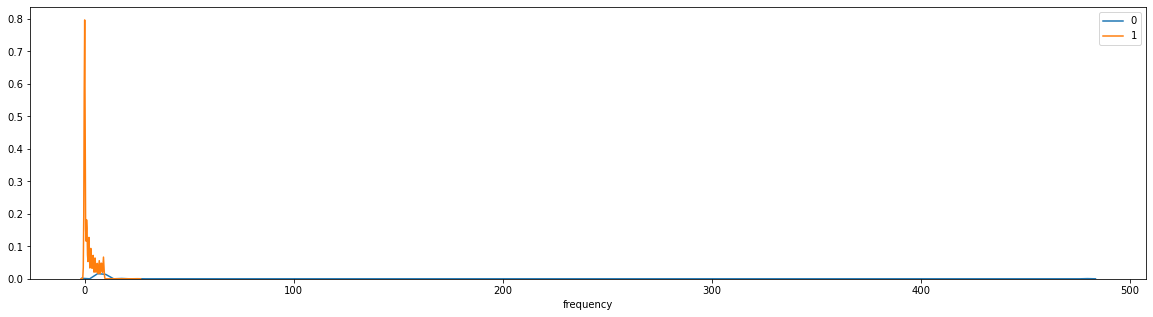

In [17]:
plt.figure(figsize=(20,5))
sns.distplot(train0["frequency"], hist=False, label="0")
sns.distplot(train1["frequency"], hist=False, label="1")

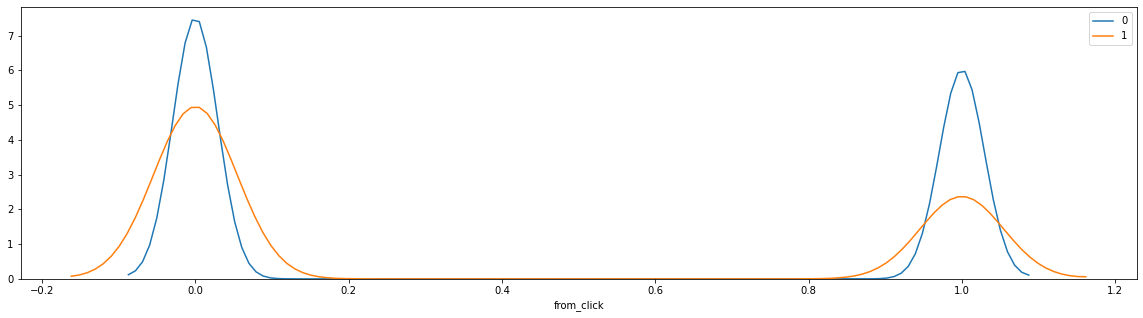

In [18]:
plt.figure(figsize=(20,5))
sns.distplot(train0["from_click"], hist=False, label="0")
sns.distplot(train1["from_click"], hist=False, label="1")

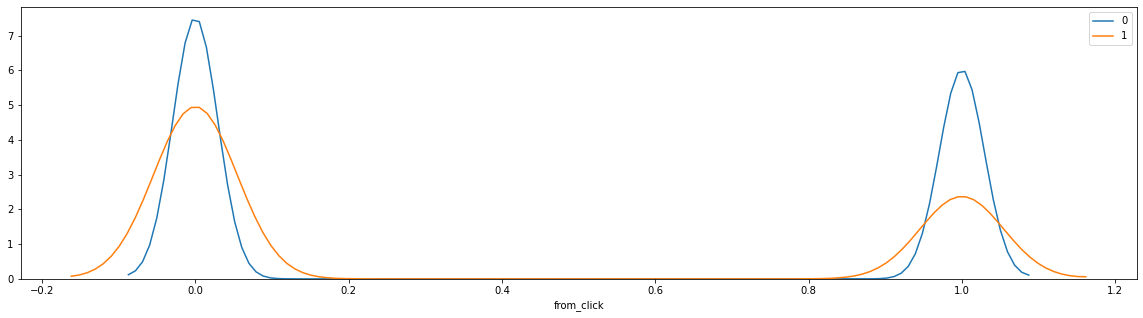

In [19]:
plt.figure(figsize=(20,5))
sns.distplot(train0["from_click"], hist=False, label="0")
sns.distplot(train1["from_click"], hist=False, label="1")

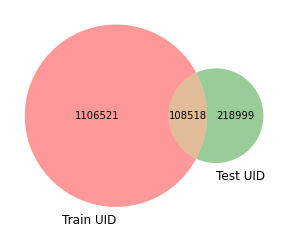

In [20]:
from matplotlib_venn import venn2
venn2(subsets=(set(train['uid'].unique()), set(test['uid'].unique())), set_labels=('Train UID', 'Test UID'))

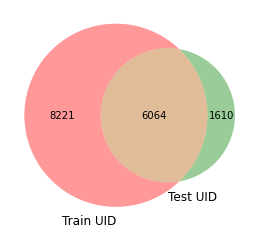

In [21]:
venn2(subsets=(set(train['app_id'].unique()), set(test['app_id'].unique())), set_labels=('Train UID', 'Test UID'))

In [22]:
concatenated["imp_at"] = pd.to_datetime(concatenated["imp_at"]).dt.date

date_campaign_df = concatenated[["imp_at", "campaign_id"]]
date_campaign_df.head()

NTOP = 30
top_campaign_id = date_campaign_df.campaign_id.value_counts().head(NTOP).index

n_unique_dates = date_campaign_df.imp_at.nunique()
unique_dates = date_campaign_df.imp_at.unique()

# 結果を格納する配列
result_array = np.zeros((NTOP, n_unique_dates), dtype=int)

for i, cid in enumerate(top_campaign_id):
    campaign = date_campaign_df.query(f"campaign_id == '{cid}'")
    grouped = campaign.groupby("imp_at").campaign_id.count()
    grouped_index = grouped.index
    for j, date in enumerate(unique_dates):
        if date not in grouped_index:
            continue
        count = grouped[date]
        result_array[i, j] = count

NameError: name 'concatenated' is not defined

# train original features

In [23]:
train[['click_or_view_at','cv_at','last_cv_interval','last_paid_interval']]

,click_or_view_at,cv_at,last_cv_interval,last_paid_interval
0,2020-04-28 00:04:21.581000,2020-04-29 00:04:05.618000,NaN,29835.0
1,2020-04-29 01:59:08.418000,2020-04-29 10:23:18.079000,NaN,159596.0
2,2020-04-28 00:09:29.655000,2020-04-29 00:08:42.200000,906634.0,156643.0
3,2020-04-28 00:10:50.270000,2020-04-29 00:03:56.930000,NaN,NaN
4,2020-05-05 17:39:43.537000,2020-05-05 23:56:19.105000,NaN,1566749.0
...,...,...,...,...
1997590,2020-05-28 23:59:02.501000,2020-05-28 23:59:36.479000,NaN,23122.0
1997591,2020-05-28 23:59:12.980000,2020-05-28 23:59:47.289000,NaN,435701.0
1997592,2020-05-28 23:59:16.015000,2020-05-28 23:59:19.808000,NaN,NaN
1997593,2020-05-28 23:59:24.167000,2020-05-28 23:59:59.906000,NaN,NaN


In [24]:
train["click_or_view_at"] = pd.to_datetime(train["click_or_view_at"])
train["cv_at"] = pd.to_datetime(train["cv_at"])

In [25]:
train["click_or_view_hour"] = train["click_or_view_at"].dt.hour
train["click_or_view_day"] = train["click_or_view_at"].dt.dayofweek

In [26]:
# https://stackoverflow.com/questions/2119472/convert-a-timedelta-to-days-hours-and-minutes
train["cv_cv_diff"] = train["cv_at"] - train["click_or_view_at"]
train["cv_cv_diff"] = train["cv_cv_diff"].progress_apply(lambda x: x.seconds/3600)
user_cv_diff_mean = train.groupby("uid")["cv_cv_diff"].mean()

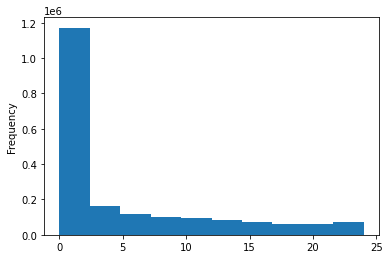

In [27]:
train["cv_cv_diff"].plot(kind="hist")

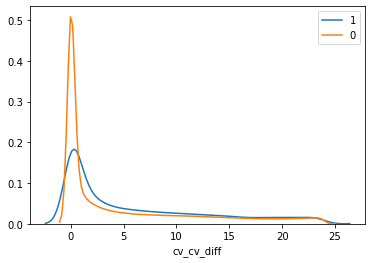

In [28]:
sns.distplot(train[train.target==1]["cv_cv_diff"], hist=False, label="1")
sns.distplot(train[train.target==0]["cv_cv_diff"], hist=False, label="0")

In [29]:
#train.groupby("uid")["click_or_view_day"].value_counts().unstack(fill_value=0)

## imp_at

In [30]:
train["imp_at"] = pd.to_datetime(train["imp_at"])
test["imp_at"] = pd.to_datetime(test["imp_at"])

In [31]:
set(train.imp_at.unique()) & set(test.imp_at.unique()) # request_idに被りなし

set()

In [32]:
train.imp_at

0         2020-04-28 00:04:14.639
1         2020-04-28 00:09:13.759
2         2020-04-28 00:09:14.708
3         2020-04-28 00:10:40.291
4         2020-04-28 00:11:45.895
                    ...          
1997590   2020-05-28 23:58:55.869
1997591   2020-05-28 23:59:06.339
1997592   2020-05-28 23:59:15.434
1997593   2020-05-28 23:59:15.506
1997594   2020-05-28 23:59:18.281
Name: imp_at, Length: 1997595, dtype: datetime64[ns]

In [33]:
test.imp_at

0        2020-06-27 00:04:19.064
1        2020-06-27 00:11:59.392
2        2020-06-27 00:14:09.341
3        2020-06-27 00:18:08.399
4        2020-06-27 00:23:18.583
                   ...          
390090   2020-07-04 23:58:27.897
390091   2020-07-04 23:58:31.012
390092   2020-07-04 23:58:37.502
390093   2020-07-04 23:58:41.421
390094   2020-07-04 23:59:03.483
Name: imp_at, Length: 390095, dtype: datetime64[ns]

In [34]:
train.groupby(['uid']).cumcount().values

array([0, 0, 0, ..., 1, 0, 1])

In [35]:
train[train.frequency==-1]

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id,date,click_or_view_hour,click_or_view_day,cv_cv_diff
4721,279bbbead54ed35b6b7a,2020-04-28 12:11:26.313,0,1,1070,NaN,9f4c76c88886efa49f72,ee2415da1f73e020c6b8,NaN,37f9d662aa2c9ce434ba,0,2020-04-28 12:14:35.516,JP,2020-04-29 02:03:48.897,75954.0,-1,1,2,e361bedf2b242ce808c6,5204520aa01acf0ec568,NaN,NaN,NaN,NaN,56459.0,NaN,2.0,13620.0,NaN,1,13.3,0,67cdeceb7a6d734d6a9e,1,NaN,2020-04-28,12,1,13.820278
5473,b9e598fa176d59b737e5,2020-04-28 12:51:00.494,0,1,1070,NaN,69cb331c58fcea55f995,ee2415da1f73e020c6b8,NaN,4cf2860d56c51c9b3497,0,2020-04-28 12:51:08.831,JP,2020-04-29 09:37:37.039,1623530.0,-1,1,2,bee249ca8631a3ffdd74,717f3f483ab917d3b77e,NaN,NaN,NaN,NaN,6167.0,NaN,9.0,47162.0,NaN,1,13.3.1,0,699fbdaac565e1872ab9,1,NaN,2020-04-28,12,1,20.774444
5916,de997a7cc416586ed4ed,2020-04-28 13:09:53.800,0,1,1070,NaN,619cee4ab9f56797a500,ee2415da1f73e020c6b8,NaN,e3f677fdd1e1b8dab7b1,0,2020-04-28 13:10:13.180,JP,2020-04-29 04:26:48.179,160629.0,-1,1,2,62533779864df32a6526,cb50f8398e8cc80f049f,NaN,NaN,NaN,NaN,902.0,92949.0,8.0,4909.0,NaN,1,13.3.1,0,64d94d59da2e630b53d1,1,NaN,2020-04-28,13,1,15.276111
6824,e8ae6235ae6f0267e54f,2020-04-28 13:45:23.591,0,1,1070,NaN,6ed2842c91c9de1a3623,25e86cebf820d8be363f,NaN,469f2de00de2298f2da6,0,2020-04-28 13:55:59.058,JP,2020-04-29 10:06:17.220,1614983.0,-1,1,2,90f84cc4425817d61186,de700a484211c4c277dc,NaN,NaN,NaN,NaN,11748.0,1570165.0,2.0,449601.0,NaN,2,8.0.0,0,e88296d1cf138de32a86,2,NaN,2020-04-28,13,1,20.171667
6920,cce6a21e074d7cbba611,2020-04-28 13:49:07.284,0,1,1070,NaN,619cee4ab9f56797a500,74e9e32ea4756d89976a,NaN,40c3c014a6102fa81fd1,0,2020-04-28 13:49:19.753,JP,2020-04-29 10:22:52.057,395389.0,-1,1,2,aaefbec1a8f15cd10d0b,717f3f483ab917d3b77e,NaN,NaN,NaN,NaN,3570.0,23220.0,3.0,92017.0,NaN,2,6.0.1,0,59f6e54c3dcb94d54de2,2,NaN,2020-04-28,13,1,20.558889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986253,3134f7c1f7841f976330,2020-05-28 14:16:18.131,0,1,1072,NaN,ba2bb260d8eccd0057a4,0cba338cfba0adad7ab6,NaN,27b3455d256ba63d10b0,0,2020-05-28 14:19:09.982,JP,2020-05-28 14:19:43.036,799702.0,-1,1,2,6cef7eed3ae745db1f1f,20caaf207aa5ad74723e,NaN,NaN,NaN,NaN,25367.0,NaN,1.0,60678.0,NaN,1,13.4.1,0,dea648da0226628935b6,1,NaN,2020-05-28,14,3,0.009167
1988588,e6fb4f32a867da4d9241,2020-05-28 15:24:12.087,0,1,1072,NaN,02964ffd5d3855453ad2,2be6e94b954351104363,NaN,6899eaeb0d1b9d6303db,0,2020-05-28 15:24:30.335,JP,2020-05-28 15:41:35.264,41798.0,-1,1,2,31f6a4f171e13f7def89,bd1eb2635dfc4e6063bd,NaN,NaN,NaN,NaN,26435.0,NaN,5.0,5629.0,NaN,2,9,0,ad20e528bd556d4e261d,2,NaN,2020-05-28,15,3,0.284444
1994637,473c2234fd04666c0061,2020-05-28 21:51:49.491,0,1,1070,NaN,c787032f8b707da24953,ee2415da1f73e020c6b8,NaN,754df1c20449532e2086,0,2020-05-28 21:52:15.744,JP,2020-05-28 23:16:49.654,125314.0,-1,1,2,d8c93b2918b6e625df20,6a2d61bdee6bbb7cabee,NaN,NaN,NaN,NaN,13498.0,NaN,2.0,29410.0,NaN,1,13.4.1,0,83685ef66d914ba6cfc8,1,NaN,2020-05-28,21,3,1.409167
1995467,752e15928ca1bed93fa1,2020-05-28 22:24:00.170,0,1,1070,NaN,02964ffd5d3855453ad2,ee2415da1f73e020c6b8,NaN,47e53eb7fcf973f67370,0,2020-05-28 22:24:02.630,JP,2020-05-28 22:26:41.105,1310008.0,-1,1,2,0ed3970e41471bfe94c7,8d9f12d2223a8c2954a6,NaN,NaN,NaN,NaN,33623.0,NaN,2.0,11936.0,NaN,1,13.1.3,0,858ebc9f24f8b9fd6e5e,1,NaN,2020-05-28,22,3,0.043889


# uid

In [36]:
train.groupby("uid").first()

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,user_type_id,video_template_id,date,click_or_view_hour,click_or_view_day,cv_cv_diff
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00000875c54c0f8fcb76,49d8e4bcecbcfe4d1259,2020-05-10 09:31:12.863,0,4,1009,NaN,d352ebd3462849796754,127100db762cb340289c,1.0,6fc63049493cda73cf7a,0,2020-05-10 09:31:13.940,JP,2020-05-10 09:31:44.832,542494.0,6,1,2,2cc2007597a19abddccc,20caaf207aa5ad74723e,0.0,0.0,NaN,NaN,14299.0,NaN,1.0,138145.0,e72944f76721e5b65b8d,1,13.3.1,2,1,NaN,2020-05-10,9,6,0.008333
00001f0fd3c477ade4a0,b8a315072bdf8a219092,2020-05-02 23:04:47.596,0,42,1123,3.0,d352ebd3462849796754,eaa7085664dfce4888b6,1.0,4571755e1d29efb19a17,0,2020-05-02 23:05:02.522,JP,2020-05-02 23:09:38.037,1799633.0,2,0,4,9dc8561cdbe655bf6c52,953c7610a60e2543c073,NaN,NaN,81039.0,NaN,15678.0,50153.0,8.0,17256.0,e6f32f3303e8448e25fc,2,8.0.0,0,2,NaN,2020-05-02,23,5,0.076389
0000227f0ef616888399,84ea1951bfd387494190,2020-05-10 10:10:09.105,0,42,1123,2.0,ba2bb260d8eccd0057a4,b299708e133025521dd0,1.0,d049dfecc758c40d5610,0,2020-05-10 10:10:18.878,JP,2020-05-10 10:17:52.837,155388.0,0,0,4,fbcb571d9b5c25a43ef2,953c7610a60e2543c073,NaN,NaN,81144.0,NaN,27142.0,NaN,1.0,50671.0,1977de20b95cca562274,2,9,0,2,NaN,2020-05-10,10,6,0.125833
000026250cb6b0f3ec3c,50d9b81c61625ebc1d2f,2020-05-13 11:48:06.082,0,8,1113,2.0,4848821a66c98af771c8,7af59752879d0811d29b,1.0,1b03252c77e7f29199c9,8488,2020-05-13 11:48:15.985,JP,2020-05-13 11:51:26.663,1367349.0,0,0,4,f5a24f3e8f06b678073a,NaN,NaN,1.0,NaN,NaN,14613.0,26099.0,6.0,504695.0,8e614b375a464f75259f,1,13.1.2,0,1,69b22b4400be9d91e6cc,2020-05-13,11,2,0.052778
00002a63e4e60345ad71,f3e5afcdbb8587135940,2020-05-02 19:41:51.531,0,28,1081,2.0,e837670eeba88976bd76,a5774a624df0e744853b,2.0,4bac7a76aa5e7ad76665,0,2020-05-02 19:42:12.874,JP,2020-05-03 10:19:59.061,178052.0,0,1,4,f237b7e038c2ba2e8759,NaN,0.0,1.0,NaN,NaN,4765.0,NaN,2.0,171677.0,85c5a019f8a125e7f06f,2,10.0.0,1,2,b5401899f2db8ce48d43,2020-05-02,19,5,14.629444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff9205736c4d4012c4,61677101ef7fd103a2b4,2020-04-30 15:11:32.757,0,28,1081,2.0,69cb331c58fcea55f995,7bb7902dd7c203dea303,2.0,ed988c556534de58e07f,0,2020-04-30 15:12:07.263,JP,2020-04-30 15:12:41.614,982100.0,1,1,4,53166b3f3ff6a2e58c4e,NaN,0.0,1.0,NaN,NaN,11516.0,NaN,2.0,93855.0,2289d78fe86fb1dd5ba2,2,8.0.0,1,2,e3f5663bc1e2e5cc282e,2020-04-30,15,3,0.009444
ffff93bd85ffdfb8a80b,28ffbe9454731fad834e,2020-05-07 02:00:23.708,0,27,1073,3.0,e837670eeba88976bd76,37ab9df0a154ba0d13d5,1.0,4bac7a76aa5e7ad76665,0,2020-05-07 02:00:26.493,JP,2020-05-07 08:33:31.541,1148747.0,0,0,4,05d23a001b234966820d,953c7610a60e2543c073,0.0,NaN,80756.0,NaN,11362.0,NaN,2.0,116766.0,7c77b12bf99f18c613ec,2,9,0,2,NaN,2020-05-07,2,3,6.551389
ffffb0e8ed58603e3d06,6e58f69d4c59335d4b5a,2020-05-08 13:03:37.687,0,10,1059,2.0,4848821a66c98af771c8,25774784746a48850c11,1.0,1b03252c77e7f29199c9,8488,2020-05-08 13:03:47.647,JP,2020-05-08 15:06:00.274,292116.0,1,0,4,ee8c397e401ae76513ef,NaN,NaN,1.0,NaN,NaN,11869.0,25469.0,3.0,67308.0,f49ca9b2dbdc629f9251,1,13.3.1,1,1,b5401899f2db8ce48d43,2020-05-08,13,4,2.036667


In [37]:
train.uid.value_counts()

d429410d7af75ca0fe20    339
5eabd714187e3e56f39f    233
14c3e5840f048fdfa431    180
a1086428fa3823aeaa11    165
e104018eaa4f1066f803    150
                       ... 
306a1f5cd6ae26194d47      1
4305afab62836fdb8fc5      1
9078234651484ddd4d9e      1
a27f5aca5ca68002c5e1      1
4affd09e069ffc3d2042      1
Name: uid, Length: 1215039, dtype: int64

In [38]:
test.uid.value_counts()

14c3e5840f048fdfa431    51
56927e802648d92c13a9    51
446e66391de0ac590e1c    37
18476a1c1d70ab549965    34
01debb312ed105fa3226    34
                        ..
d47b9ede41215589ca1d     1
2f1a07f5c31bae66db25     1
248df020716e47181384     1
a587857aae141943e042     1
53b55a059a9bcda5f5d4     1
Name: uid, Length: 327517, dtype: int64

In [39]:
set(train.uid.unique()) - set(test.uid.unique())

{'4affd09e069ffc3d2042',
 '7fa4648516514b79dfe5',
 'dbeb6cb992dd610ccbfd',
 '79b3671426c5f0c5a3c9',
 '4ae049e34944d8464bc0',
 '62eb8ef2619d1658d203',
 '5e014588f8c9c22102cd',
 '9ea0d4af312bee01d1e5',
 '57755f23ca54e1305e3f',
 '2fdfaece3cc46b5ef96a',
 'ebe502990a3d1fa9b705',
 '5c0383690f079f8a1707',
 '4c29a6663b86001d0d0d',
 '61d7f0b049e8fbfd2da5',
 '8662a68cafcbc81bb9f0',
 '6989c17362bda8d02794',
 '3861e64c50afbd14781a',
 '5ee6af100746807915b2',
 '46b10cf3d3d9780be211',
 '0dd8211494dbbb1f99ad',
 '8a1dd08e234e76c8795d',
 'f79fe550343833552fab',
 '81eac024a613067d6e0c',
 'c26316045f4332a61706',
 '7fb9add424cf35d44430',
 '3744768dc0e8ab9cedf6',
 '2afafe7003eb801a0082',
 'f83537183fb2e3cd9c3a',
 '4a57212dc6d9f653365c',
 'e50244626779507b4510',
 '64dd46014409ccc57931',
 '932e2d24099ae01efc15',
 '9d381c91cc4d50a8f8d4',
 '2a432828105c855a7823',
 'bbd82d6cd3d78ccf24e5',
 '738433a03ba12a787fc5',
 '60b96f06f8c417967683',
 'beb8e7c8e0ed018f92d1',
 '20f13fb670df54ccb9de',
 '9c9151d6c1dd5beaf2c3',


In [40]:
train.game_feed_asset_type_id.unique()

array([4, 2, 5, 1])

In [41]:
train[train.uid=="d429410d7af75ca0fe20"].cumcount()

AttributeError: 'DataFrame' object has no attribute 'cumcount'

# video

In [42]:
video = video.rename(columns = {"mst_advertiser_id":"advertiser_id"})
video.head()

,id,advertiser_id,duration,width,height,file_size
0,00007c2cea6e8b84d25a,d352ebd3462849796754,15,1280,720,19450664.0
1,000217bb188dbc73a605,6896e5bce9d6be22b717,14,1280,720,18781163.0
2,0004b0f4631bf87421d7,8f4b5b2cc6cb4d1c8121,15,1280,720,19601616.0
3,0005ddab6abfd46c11e4,8802554240c3fafa905f,27,1280,720,33344533.0
4,001066f3b8b218ee0125,e89f02f0e8e333b10661,11,720,1280,10265222.0


In [43]:
len(video.advertiser_id.unique())

447

In [44]:
len(video.id.unique())

11707

In [45]:
print(video.id.unique()[0])

00007c2cea6e8b84d25a


In [46]:
for i in train.columns:
    if str(train[i].dtype)=="object":
        if set(video.id.unique()).issubset(set(train[i].unique())):
            print(i)
            break

In [47]:
video.describe()

,duration,width,height,file_size
count,11707.000000,11707.000000,11707.000000,1.161900e+04
mean,15.371316,1424.328863,925.809687,2.284601e+07
std,6.381374,376.574710,275.882977,1.961414e+07
min,2.000000,272.000000,270.000000,5.723770e+05
25%,11.000000,1280.000000,720.000000,1.240209e+07
50%,15.000000,1280.000000,720.000000,1.859766e+07
75%,18.000000,1920.000000,1080.000000,2.494706e+07
max,56.000000,2200.000000,1920.000000,2.079454e+08


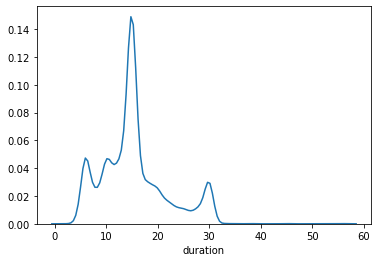

In [48]:
sns.distplot(video.duration, hist=False)

# map game feed

In [49]:
map_game_feed_native_video_assets.shape

(2796, 3)

In [50]:
map_game_feed_native_video_assets.isnull().sum()

mst_game_feed_id                         0
horizontal_mst_advertiser_video_id       0
vertical_mst_advertiser_video_id      2794
dtype: int64

In [51]:
map_game_feed_native_video_assets.head(10)

,mst_game_feed_id,horizontal_mst_advertiser_video_id,vertical_mst_advertiser_video_id
0,000f11b9d1225337a7d8,714ffeb76a9b990a460a,NaN
1,001a50dc93d000d05e98,e30c54033d5725c7b0da,NaN
2,005475e001fe479df1cd,621a4111eb2df50b6ac6,NaN
3,00645c3a0b896998c0ab,87db2dbadddc0cac8e86,NaN
4,00746b40feb00159ff42,c36e5da95059efef96b0,NaN
5,008c205e2deeeded6428,742f89fe2049e01afaff,NaN
6,009495127c80664d528b,d80ba0003a22531d57d5,NaN
7,00a75e160a6be457f462,07cce45670ae163198c3,NaN
8,00d88ba96896437bab91,c48eaa964385a390719d,NaN
9,0132d2b526695c42409b,8663899d1a92a7906290,NaN


In [52]:
map_game_feed_native_video_assets.dropna()

,mst_game_feed_id,horizontal_mst_advertiser_video_id,vertical_mst_advertiser_video_id
975,5dd3242e3a1bb99f905a,ca4da143212422c06aec,bba6a3aaa505e3694446
1893,b026b699ae7e3f81e65e,19150ba8e5f212da7a8e,1397dfa85ac6f557dafe


In [53]:
for i in map_game_feed_native_video_assets.columns:
    if video.id.unique()[1] in list(set(map_game_feed_native_video_assets[i].unique())):
        print(i)

horizontal_mst_advertiser_video_id


In [54]:
video.id.unique()[1]

'000217bb188dbc73a605'

# advertiser converted video

In [55]:
# 重複があるので削除する
advertiser_converted_video = advertiser_converted_video.drop_duplicates(subset=["mst_advertiser_video_id", "mst_game_feed_id", "mst_video_template_id"], keep="last")

In [56]:
advertiser_converted_video.head()

,mst_advertiser_video_id,mst_game_feed_id,width,height,file_size,bitrate,rectangle_type,mst_video_template_id
1,00007c2cea6e8b84d25a,NaN,960,540,2165379.0,1000000,horizontal,fd63a18641d9983bebfe
3,00007c2cea6e8b84d25a,83628c075ab93e4dfd3d,540,960,2081216.0,1000000,vertical,e3f5663bc1e2e5cc282e
6,00007c2cea6e8b84d25a,83628c075ab93e4dfd3d,540,960,2112860.0,1000000,vertical,69b22b4400be9d91e6cc
7,00007c2cea6e8b84d25a,83628c075ab93e4dfd3d,960,540,2115934.0,1000000,horizontal,280cbc5da35108febc39
10,00007c2cea6e8b84d25a,83628c075ab93e4dfd3d,540,960,2108472.0,1000000,vertical,b5401899f2db8ce48d43


In [57]:
advertiser_converted_video.shape

(107493, 8)

In [58]:
advertiser_converted_video.mst_advertiser_video_id.unique()[10]

'003d08668fb22b6a1982'

In [59]:
for i in map_game_feed_native_video_assets.columns:
    if advertiser_converted_video.mst_advertiser_video_id.unique()[12] in list(set(map_game_feed_native_video_assets[i].unique())):
        print(i)

# campaign

In [60]:
campaign.groupby(["mst_advertiser_id", "mst_user_type_id"])["id"].count().reset_index(drop=False)

,mst_advertiser_id,mst_user_type_id,id
0,00338a65a70fea29e1fd,34,1
1,00338a65a70fea29e1fd,35,1
2,00338a65a70fea29e1fd,36,1
3,00338a65a70fea29e1fd,37,1
4,00338a65a70fea29e1fd,38,1
...,...,...,...
7227,ffd2ab02de2ce773588c,34,2
7228,ffd2ab02de2ce773588c,35,2
7229,ffd2ab02de2ce773588c,36,2
7230,ffd2ab02de2ce773588c,37,2


In [61]:
campaign

,id,mst_advertiser_id,mst_advertiser_order_id,mst_user_type_id
0,000233300eee9b73e163,b0ad86b95208b2bcaa56,9e332230144cbf3c8398,40
1,0005732c3bfebf43d001,2261bdf815fdb9a29193,6af6ecac9114b64edb79,39
2,0008fe8bfb493d08dafc,ba2bb260d8eccd0057a4,e51db809d3b307ca2ba7,36
3,00136688c2541c9f504b,c9c77dde0126606b0220,18463b788223600b8600,37
4,0015789eee1d47b71a87,d9b9356e8f4c9df90b5d,f80899a466fbe47b9fce,38
...,...,...,...,...
14622,ffebe1e00669a833db23,b6adb4a99d6f48f8901c,2496f347fd68f52d4c01,38
14623,ffed896cdef582117ed1,72aff2896de7c798e150,f4d20e51b15cc71b56f4,4
14624,fffaa9f1a42aa76aef25,f6fbaaa53bc721ea22ac,85e025d09dc2bf305c80,39
14625,fffc6a78c2415e3b8aa6,fd1cace6242470215c9b,9d7f8395bdf2bc6009ea,25


In [62]:
tmp = campaign[campaign.mst_user_type_id.isin([1,2,3,4])].copy()
for i in tmp.columns:
    print(len(tmp[i].unique()))

1484
342
342
4


In [63]:
set(tmp.id) & set(train.request_id)

set()

In [64]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14627 entries, 0 to 14626
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       14627 non-null  object
 1   mst_advertiser_id        14627 non-null  object
 2   mst_advertiser_order_id  14627 non-null  object
 3   mst_user_type_id         14627 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 457.2+ KB


In [65]:
for i in campaign.columns:
    print(len(campaign[i].unique()))

14627
1381
1499
52


# all df (feature engineering)

In [66]:
train["type"] = "train"
test["type"] = "test"
all_df = pd.concat([train, test])

#all_df.groupby("uid").agg("mean")["from_click"].values.mean()
#all_df.groupby("uid")["request_id"].count().mean()

# cumsum from click by uid
#tmp1 = all_df.groupby(['uid'])['from_click'].progress_apply(lambda x: pd.concat([pd.DataFrame([0]), x.cumsum()[:-1]])).reset_index(drop=True).values
#tmp1 = np.array(tmp1, dtype=float)
# cumsum total num by uid
#tmp2 = all_df.groupby(['uid']).cumcount().values
#tmp2 = np.array(tmp2, dtype=float).reshape(-1,1)
# https://stackoverflow.com/questions/26248654/how-to-return-0-with-divide-by-zero
#from_click_ratio = np.divide(tmp1, tmp2, out=np.ones_like(tmp1)*-1, where=tmp2!=0)

In [67]:
all_df["imp_at"] = pd.to_datetime(all_df["imp_at"])
all_df["date"] = all_df["imp_at"].dt.date

In [68]:
all_df = all_df.sort_values(["uid", "imp_at"]).reset_index(drop=True)

In [69]:
all_df["uni_campaign"] = all_df.groupby("uid")["campaign_id"].progress_apply(lambda x: 1- x.duplicated())
all_df["uni_campaign"] = all_df.groupby("uid")["uni_campaign"].progress_apply(lambda x: x.cumsum())

In [70]:
all_df.head(100)

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,click_or_view_at,country_code,cv_at,first_login_interval,frequency,from_click,game_feed_asset_type_id,game_feed_id,game_template_id,header_bidding,is_interstitial,item_id,last_cv_interval,last_login_interval,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id,date,click_or_view_hour,click_or_view_day,cv_cv_diff,type,uni_campaign
0,49d8e4bcecbcfe4d1259,2020-05-10 09:31:12.863,0.0,4,1009,NaN,d352ebd3462849796754,127100db762cb340289c,1.0,6fc63049493cda73cf7a,0,2020-05-10 09:31:13.940,JP,2020-05-10 09:31:44.832,542494.0,6,1,2,2cc2007597a19abddccc,20caaf207aa5ad74723e,0.0,0.0,NaN,NaN,14299.0,NaN,1.0,138145.0,e72944f76721e5b65b8d,1,13.3.1,2,00000875c54c0f8fcb76,1,NaN,2020-05-10,9.0,6.0,0.008333,train,1
1,b8a315072bdf8a219092,2020-05-02 23:04:47.596,0.0,42,1123,3.0,d352ebd3462849796754,eaa7085664dfce4888b6,1.0,4571755e1d29efb19a17,0,2020-05-02 23:05:02.522,JP,2020-05-02 23:09:38.037,1799633.0,2,0,4,9dc8561cdbe655bf6c52,953c7610a60e2543c073,NaN,NaN,81039.0,NaN,15678.0,50153.0,8.0,17256.0,e6f32f3303e8448e25fc,2,8.0.0,0,00001f0fd3c477ade4a0,2,NaN,2020-05-02,23.0,5.0,0.076389,train,1
2,84ea1951bfd387494190,2020-05-10 10:10:09.105,0.0,42,1123,2.0,ba2bb260d8eccd0057a4,b299708e133025521dd0,1.0,d049dfecc758c40d5610,0,2020-05-10 10:10:18.878,JP,2020-05-10 10:17:52.837,155388.0,0,0,4,fbcb571d9b5c25a43ef2,953c7610a60e2543c073,NaN,NaN,81144.0,NaN,27142.0,NaN,1.0,50671.0,1977de20b95cca562274,2,9,0,0000227f0ef616888399,2,NaN,2020-05-10,10.0,6.0,0.125833,train,1
3,50d9b81c61625ebc1d2f,2020-05-13 11:48:06.082,0.0,8,1113,2.0,4848821a66c98af771c8,7af59752879d0811d29b,1.0,1b03252c77e7f29199c9,8488,2020-05-13 11:48:15.985,JP,2020-05-13 11:51:26.663,1367349.0,0,0,4,f5a24f3e8f06b678073a,NaN,NaN,1.0,NaN,NaN,14613.0,26099.0,6.0,504695.0,8e614b375a464f75259f,1,13.1.2,0,000026250cb6b0f3ec3c,1,69b22b4400be9d91e6cc,2020-05-13,11.0,2.0,0.052778,train,1
4,f3e5afcdbb8587135940,2020-05-02 19:41:51.531,0.0,28,1081,2.0,e837670eeba88976bd76,a5774a624df0e744853b,2.0,4bac7a76aa5e7ad76665,0,2020-05-02 19:42:12.874,JP,2020-05-03 10:19:59.061,178052.0,0,1,4,f237b7e038c2ba2e8759,NaN,0.0,1.0,NaN,NaN,4765.0,NaN,2.0,171677.0,85c5a019f8a125e7f06f,2,10.0.0,1,00002a63e4e60345ad71,2,b5401899f2db8ce48d43,2020-05-02,19.0,5.0,14.629444,train,1
5,6ae65aaf893302ef27ef,2020-05-09 00:38:26.085,0.0,28,1081,1.0,928bf594e59f394b5c5d,cd24da1716742b5809ba,2.0,c8d78d17428d94d524da,0,2020-05-09 00:38:38.939,JP,2020-05-09 00:39:11.433,572820.0,8,1,4,80feee1b8dbb49a4827c,NaN,0.0,1.0,NaN,NaN,10153.0,NaN,5.0,35283.0,37d13f4cf5f93f418588,2,9.0.0,1,00003fdd5856b7221cdf,2,e3f5663bc1e2e5cc282e,2020-05-09,0.0,5.0,0.008889,train,1
6,5cab2f405741934257f2,2020-07-01 15:58:03.587,NaN,42,1123,2.0,d352ebd3462849796754,a80506ae271dc9cf1d6a,1.0,84095859da9cffce1c60,0,NaT,JP,NaT,606140.0,0,1,4,a243f2888d5f76dacc45,953c7610a60e2543c073,NaN,NaN,84332.0,NaN,11579.0,NaN,1.0,47995.0,f2c64b51ca3ee927f391,1,13.5.1,0,00003fe9c32d1f2ba518,1,NaN,2020-07-01,NaN,NaN,NaN,test,1
7,e46bc77e0355384abce1,2020-04-29 01:09:51.750,0.0,42,1123,3.0,e966db3d5806a7a6d9ea,f6397d0b7f1617aa0726,1.0,be429b89593a3ca2d0d9,0,2020-04-29 01:10:01.751,JP,2020-04-29 01:22:33.281,169465.0,8,0,4,2ef89172cee5de69a215,953c7610a60e2543c073,NaN,NaN,80157.0,NaN,19506.0,NaN,1.0,34847.0,ff850b1371f96456f0bb,1,13.4.1,0,0000433237bbeac20bca,1,NaN,2020-04-29,1.0,2.0,0.208611,train,1
8,ce4e616b2ca797b1ee8b,2020-05-23 12:06:47.020,0.0,27,1073,3.0,d9c1b1bfe982db07b7ad,02f5ae5f8edf4644c852,1.0,f6a5fba82d79cf670e53,0,2020-05-23 12:06:59.590,JP,2020-05-24 02:04:55.379,203448.0,7,0,4,0d965fba255aef0afb47,953c7610a60e2543c073,0.0,NaN,71073.0,NaN,11941.0,NaN,2.0,181124.0,996aff7a50b43c647432,1,13.4.1,0,0000433237bbeac20bca,1,NaN,2020-05-23,12.0,5.0,13.965278,train,2
9,46a619c8794a142ef459,2020-06-27 23:46:06.230,NaN,42,1123,3.0,0510fb063daf6036af80,a3929334d3be0fa88d3c,1.0,f

In [71]:
all_df.groupby("uid")["tmp"].max().max()

KeyError: 'Column not found: tmp'

In [72]:
all_df.groupby("uid")["date"].progress_apply(lambda x: x.diff(1))

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
                ...       
2387685                NaN
2387686                NaN
2387687                NaT
2387688    3 days 00:00:00
2387689                NaN
Name: date, Length: 2387690, dtype: object

In [73]:
tmp = all_df[all_df.uid=="01debb312ed105fa3226"].copy()
tmp["dif_login"] = tmp["date"].diff(1)
tmp["dif_login"] = tmp["dif_login"].apply(lambda x: x.days)
tmp["dif_login"] = tmp["dif_login"].fillna(0)
tmp["total_logdays"] = tmp["dif_login"].apply(lambda x: x if x in [0,1] else 1).cumsum() + 1
tmp["con_logdays"] = tmp["dif_login"].cumsum() + 1

In [74]:
tmp[["dif_login","total_logdays", "con_logdays"]].head(100)

,dif_login,total_logdays,con_logdays
17213,0.0,1.0,1.0
17214,0.0,1.0,1.0
17215,0.0,1.0,1.0
17216,1.0,2.0,2.0
17217,0.0,2.0,2.0
17218,0.0,2.0,2.0
17219,1.0,3.0,3.0
17220,0.0,3.0,3.0
17221,0.0,3.0,3.0
17222,1.0,4.0,4.0
